## Project Proposal:
**<u>Website</u>**: https://www.the-numbers.com/movies/release-schedule

**<u>Summary</u>**: I plan to scrape the dates, number of movies released on each date, and the distributor information from all movies on the release schedule on the-numbers.com website. I will store each date and movie count into a dictionary data structure with format {date : movie count} by creating an accumulator loop to increment count for each date. I will apply the same concept to the distributor information over all dates with format {distributor : movie count}. I think I will need to convert the string dates into date objects using the DateTime module in order to create a reasonable visualization. I would like to assess if there are cyclical patterns in release dates and to assess the overall distribution of movies released by distributors.  

**<u>Data Visualization</u>**: After I have scraped the above data, I will create a scatter plot of the dates and movie counts and create a line graph of the distributor and movie counts. 

# Webscraping Script:

In [227]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
#create function to scrape the binary of the webpage
def getSoup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    return soup

In [229]:
#use above function to scrape my chosen site
soup = getSoup('https://www.the-numbers.com/movies/release-schedule')

In [230]:
#pulling the dates from 'id' attributes and converting them to datetime objects
datesforMoviesDict = {}
trs = soup.table.find_all('tr')
datesList = []
for tr in trs:
    if 'id' in tr.attrs:
        datesforMoviesDict[tr['id']]=1
        year = tr['id'][0:4]
        month = tr['id'][5:7]
        day = tr['id'][8:]
        datesList.append(datetime.datetime.strptime(tr['id'], '%Y-%m-%d'))
        tds = tr.find_all('td')
       



In [231]:
#processing the dates to determine the distribution of pending release dates per month
monthList = []
strMonth = []
monthCount = {}
monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#pulling the month from each datetime in the datesList and sorting in ascending order i.e.Jan-Dec
for item in datesList:
    monthList.append(item.month)
monthList.sort()
#for each number month in monthList convert the month to a
#string based on monthDict and save to strMonth list
for item in monthList:
    month = monthDict[item]
    strMonth.append(month)
    #for each unique string month add it as a key to monthCount dict
    #with value 0 (start month counter)
    if month not in monthCount:
        monthCount[month]=0
#Count how many times each month is in strMonth list; update monthCount dict value for matching
#string month
for month in strMonth:
    monthCount[month]+=1        

# Data Visualization Script

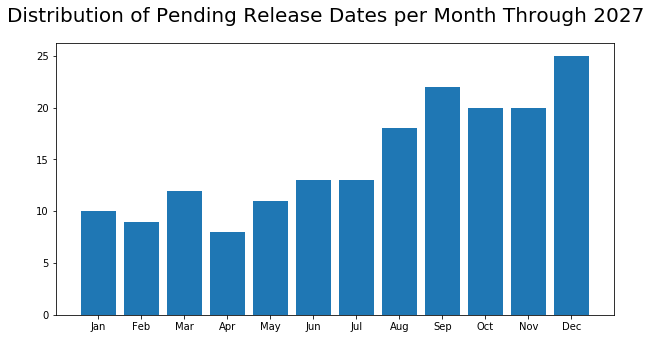

In [232]:
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(list(monthCount.keys()), list(monthCount.values()))
fig.suptitle('Distribution of Pending Release Dates per Month Through 2027', fontsize=(20));
#axs.set_title()



# Summary
<p>Over the duration of the data set at The-Numbers.com, from 2019 to 2027, there appears to be a slightly linear correlation between the number of movies released and the season in which they are released. Meaning that there are seemingly more movies released towards the end of the year, in the fall/holiday season, than the rest of the year.

# Scrapping / processing the Distributor Information

In [237]:
#do the same thing for distributors i.e. pull all distributors for each movie and count how many
#movies they relase in total.
distCount={}
distList = []
trs = soup.table.find_all('tr')
for tr in trs:
    tds = tr.find_all('td')
    for td in tds:
        aTags = td.find_all('a')
        for a in aTags:
            if a['href'][0:7] == '/market': #if the a tag is for a distributor...
                distributor = a.text
                distList.append(a.text)     #add to distList
                #for unique distributor add to distCount dict with value = 0 (start counter)
                if distributor not in distCount:
                    distCount[distributor]=0
#count how many movies each distributor is releasing by updating corresponding value in distCount
for distributor in distList:
    distCount[distributor]+=1
#strip the above dict for distributors releasing more than five movies total    
distCounto10 = {}
for i,j in distCount.items():
    if j >= 5:
        distCounto10[i]=j


# Distributor Visualization Script

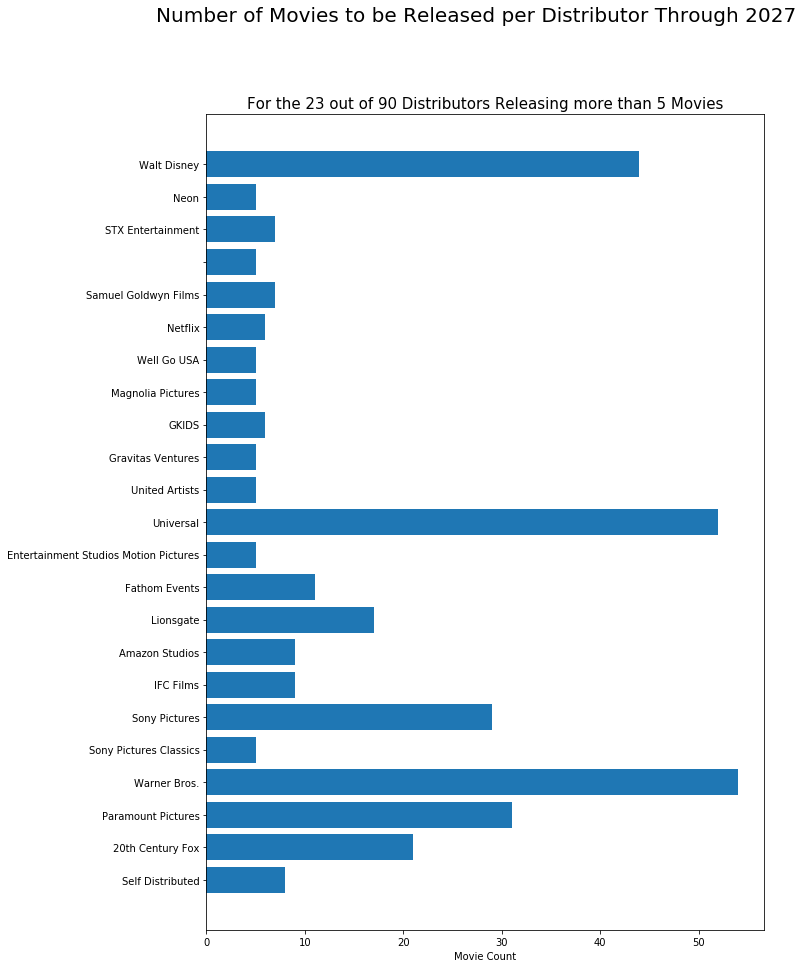

In [234]:
fig, axs = plt.subplots(figsize=(10,15))
axs.barh(list(distCounto10.keys()), list(distCounto10.values()))
fig.suptitle('Number of Movies to be Released per Distributor Through 2027', fontsize=(20))
axs.set_title('For the 23 out of 90 Distributors Releasing more than 5 Movies', fontsize=(15))
axs.set_xlabel('Movie Count');
    

# Distributor Summary
<p>The main take away when reviewing the distributor data is that there appears to be a dramatic gap between the lagest distributors and everyone else. Only the top 7% of distributors appear to be releasing more than ten movies. Nearly 75% of the distributors are not scheduled to release more than 5 movies.

In [235]:
#Attempted to determine the distribution of movies released on each date.
#Got this close!
#count the number of movies on each date & add to datesforMoviesDict
count=0
keyDate=""
for tr in trs:
    #print('count before new tr loops', count) DON'T ADD COUNT HERE!
    if 'id' in tr.attrs:
        #print(keyDate,'count before id found:',count)
        keyDate = tr['id']
        
        #print('this row was not counted...')
        count=0
    else:
        count+=1
        #print(count)
    if keyDate in datesforMoviesDict:
            datesforMoviesDict[keyDate]=count   
            


Text(0.5, 0.98, 'Number of Movies Set to Release per Date Through 2027')

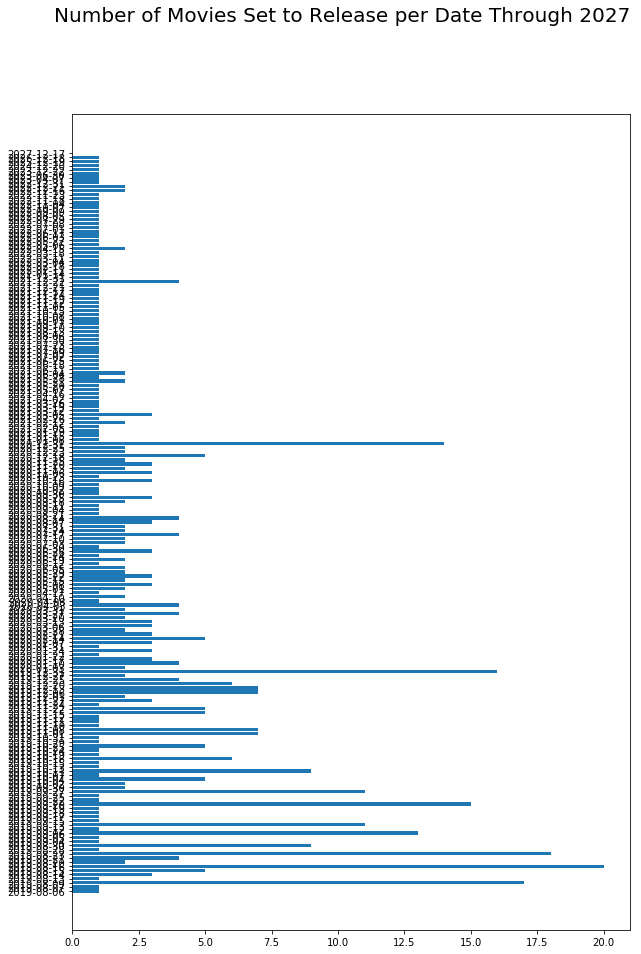

In [236]:
fig, axs = plt.subplots(figsize=(10,15))
axs.barh(list(datesforMoviesDict.keys()), list(datesforMoviesDict.values()))
fig.suptitle('Number of Movies Set to Release per Date Through 2027', 
             fontsize=(20))